In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression().fit(X,y)

#Hint: .fit()

Intercept: -32304.654721028113
Coefficient: [269.46205468]
mean squared error:  57947526161.288376
Score:  0.49670880166311393


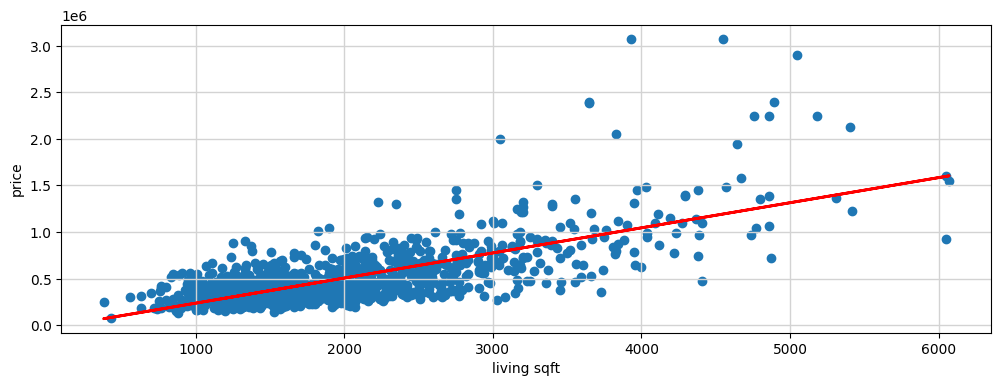

In [3]:
#b)

#Your code:
plt.figure(figsize=(12,4))
plt.xlabel('living sqft')
plt.ylabel('price')

plt.grid(color='lightgray', linestyle='-', linewidth=1)

plt.scatter(X,y)
plt.plot(X, model.predict(X), color='red', linewidth=2)

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

print('mean squared error: ',mean_squared_error(y, model.predict(X)))

print('Score: ', model.score(X,y))
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

On this plot, we can see a red line which represents our model generated by linear regression. Using this model we can say eg. that a house that has 2000 square feet should cost about 500000. We can see that this model not really is good for bigger houses, because our data points are far from the line.

Our model is predicting values with accuracy at a level of 0.49, so this isn't a really good model. Also, our mean squared error is high.

Intercept is the expected mean value of Y when all X=0. So in our model, the value isn't meaningful because the house needs to have square footage greater than zero.

The coefficient is the value that multiplies the predictor values (y=3X+5 -> 3 is the coefficient)
Our coefficient is equal to +269, a sign indicate the predictor variable increases and the response variable also increases. We can see this in our plot.

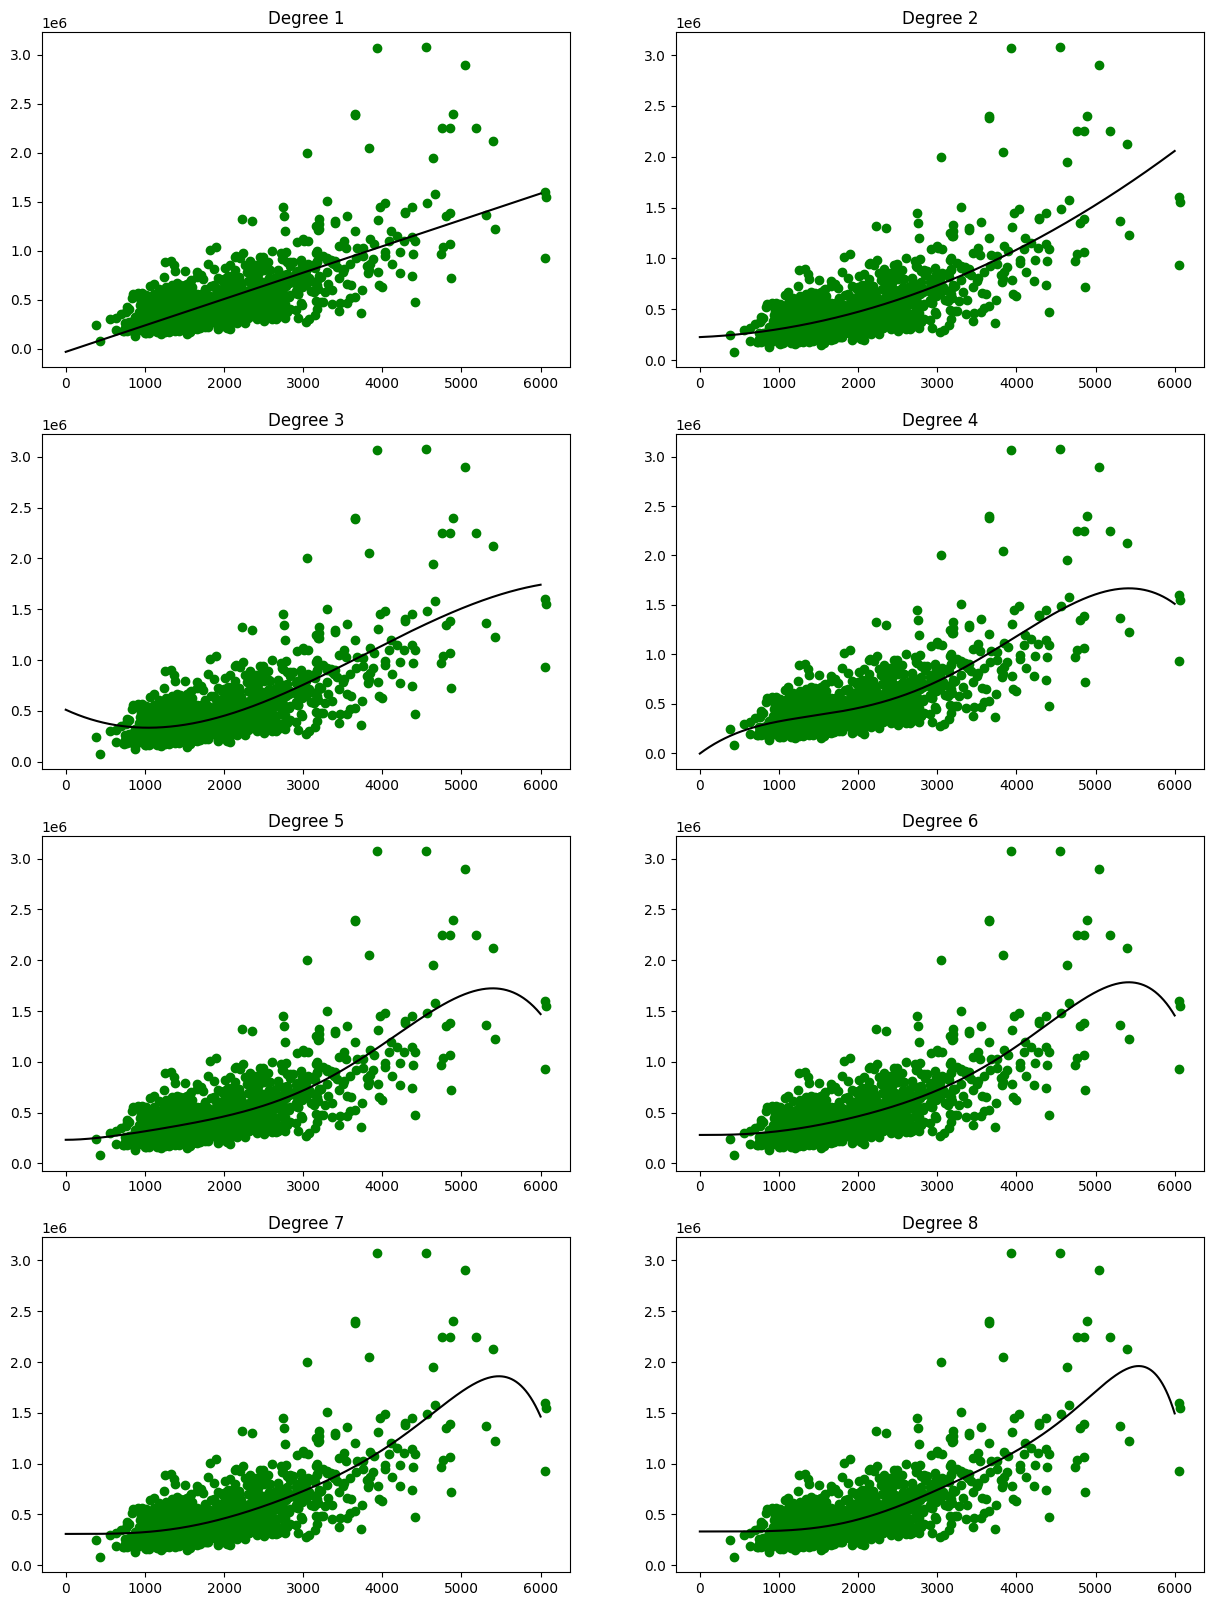

In [4]:
#c)
     
figure, axis = plt.subplots(4,2, figsize=(15,20))
row = 0
col = 0
error=[]
score=[]

lr=LinearRegression()

for order in range(1,9):        
    poly = PolynomialFeatures(order, include_bias = False)    
    X_order = poly.fit_transform(X)        
  
    lr.fit(X_order,y)
    x_predict = np.linspace(0,6000,1000)
    y_predict = lr.predict(poly.transform(x_predict.reshape(-1,1)))


    #ploting
    axis[row,col].set_title('Degree ' + str(order))
    axis[row,col].scatter(X,y, color="green")
    axis[row,col].plot(x_predict, y_predict, color='black')
    
    #finding position
    col = (col+1)%2
    if (order % 2 == 0):
        row += 1

    #error
    error.append(mean_squared_error(y, lr.predict(X_order)))
    score.append(lr.score(X_order,y))



We can see that higher-order polynomials better fit our data.
In low square footage, data points aren't really fit our first attempt with just a straight line because points have a tendency to be flatter in this area. But this problem is dealt with by the second-degree polynomial really well.
There is also a problem with houses with big square footage. With each successive degree of the polynomial, we get a better fit to these points

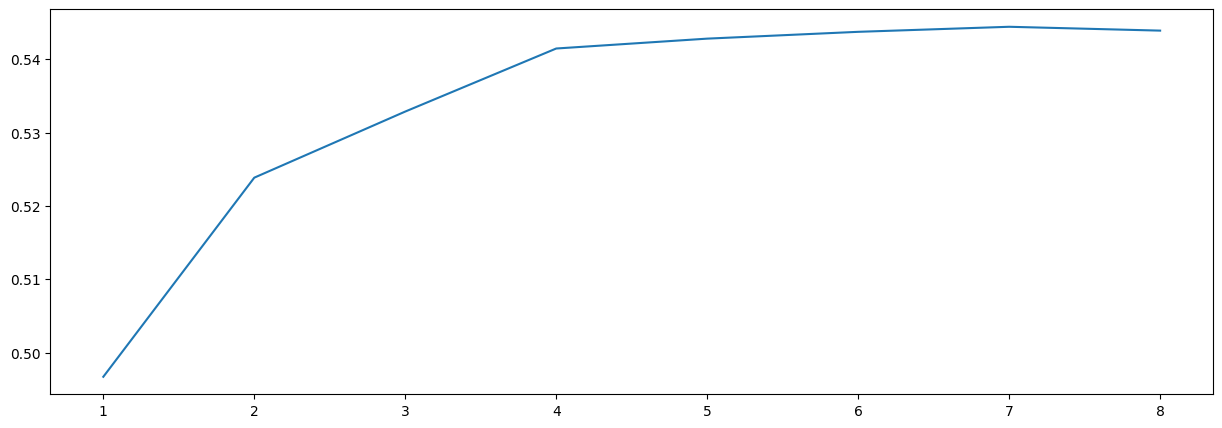

In [5]:
plt.figure(figsize=(15,5))
plt.plot(range(1,9),score)

We can see that our accuracy increases. So our model is better and better with a higher degree. Around degrees 4 and 5, we don't see that much improvement in accuracy anymore.

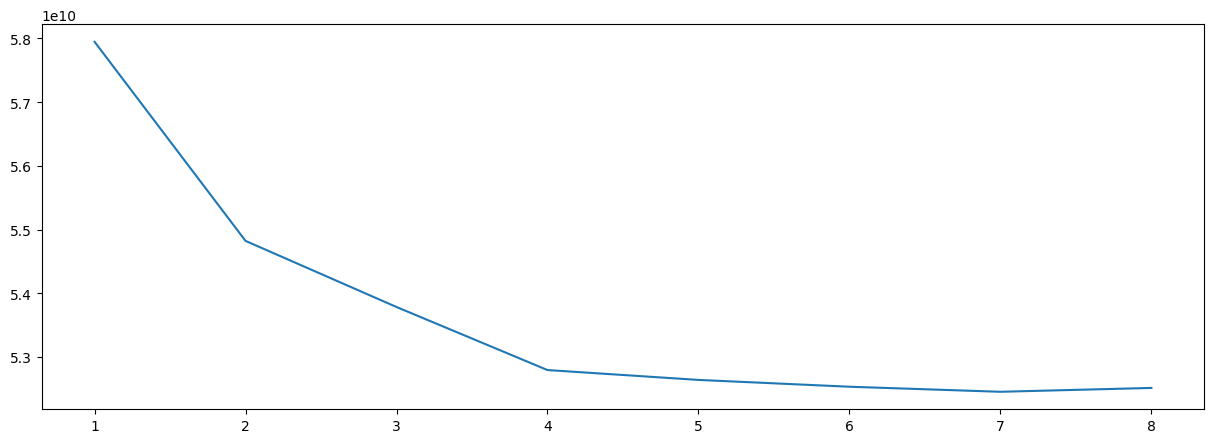

In [6]:
plt.figure(figsize=(15,5))
plt.plot(range(1,9),error)

Same with the error. The error decreases with each successive degree of the polynomial, which indicates an improvement in the fit of the model, but around the 4th degree, the improvement is not so visible.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

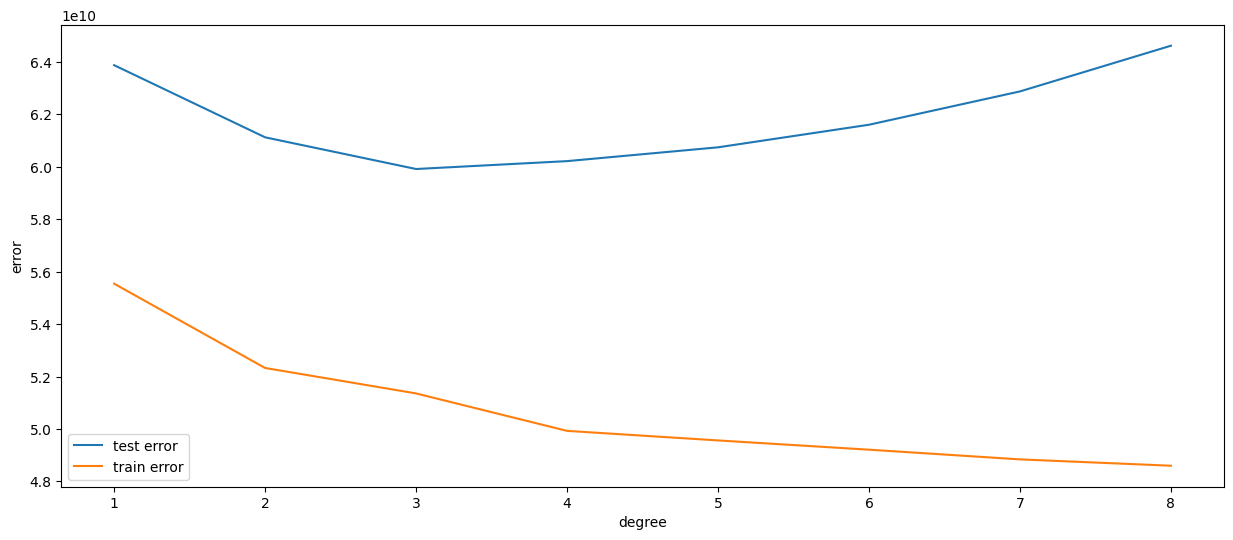

In [7]:
error_test = []
error_train = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    lr = LinearRegression()
    model = lr.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    error_train.append(mean_squared_error(y_pred_train, y_train))

    y_pred_test = model.predict(X_test)
    error_test.append(mean_squared_error(y_pred_test, y_test))

   
#ploting
plt.figure(figsize=(15, 6)) 
plt.plot(range(1,9), error_test, label="test error")
plt.plot(range(1,9), error_train, label="train error")
plt.xlabel('degree')
plt.ylabel('error')
plt.legend()



We can see that training error decreases when the degree is increasing. But test error after 3rd degree starts to increase. It is because of overfitting. Our trained model fits almost perfectly to our data points, so this model isn't good enough to predict points that it's never seen.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

mean squared error:  396407.1889615157
score:  0.49670880166311404


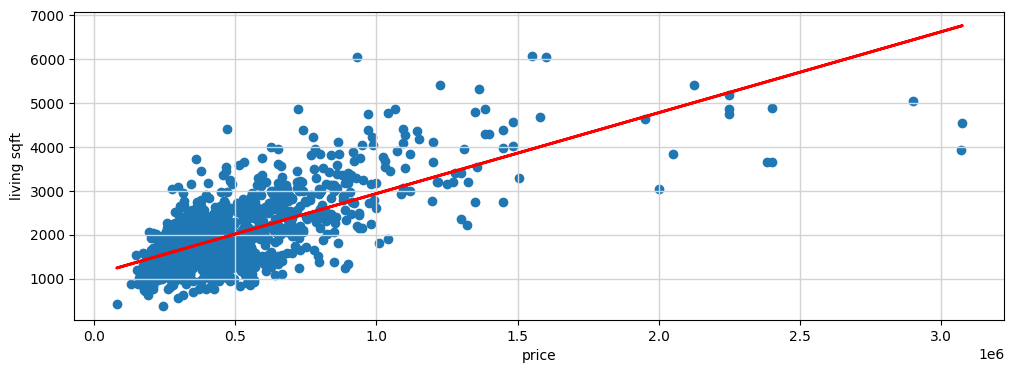

In [8]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression().fit(X,y)

plt.figure(figsize=(12,4))
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.xlabel('price')
plt.ylabel('living sqft')

plt.scatter(X,y)
plt.plot(X, model.predict(X), color='red', linewidth=2)


print('mean squared error: ',mean_squared_error(y, model.predict(X)))

print("score: ", model.score(X,y))


This model predicts house square footage based on price. If we have a specific budget eg. 1 million. Our model shows that we can buy a house that is roughly 3000 square feet.

In [9]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
err_to_beat = mean_squared_error(y_pred, y_test)


Mean squared error equals: 48749229429.97386


To predict house prices we should take into consideration more features which influence the price. Here we used sqft_living, sqft_lot, grade and view.  Error is on level 487*10^8.

In [10]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Here I plot some possible features.

In [11]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'yr_built', 'view', 'sqft_living15', 'zipcode']].values.reshape(-1,7)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=30)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
my_err = mean_squared_error(y_pred, y_test)



Mean squared error equals: 35557004097.09774


In [12]:
if my_err < err_to_beat:
    print('smaller!')
else:
    print('worse')


smaller!


In [13]:
print(48749229429.97386 - 35557004097.09774)


13192225332.876122


To lower the error I add more features with are correlated with price.
Firstly I add yr_built and err = 40552232698.9698

Then I add more like sqft_living15 and zipcode
And the error was equal to 36443979899.73753

When I change also random state from 43 to 30 error decreased to 35557004097.09774

I managed to decrease the error by 13*10^9